<a href="https://colab.research.google.com/github/SoleromYess/Simulaci-n-II/blob/main/Inventario_con_simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importar librerías
!pip install simpy
import simpy
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.16 sold 2
0.53 sold 4
0.69 sold 2
0.88 sold 3
1.00 sold 3
1.01 sold 1
1.11 sold 3
1.44 sold 3
1.61 sold 2
1.97 sold 1
1.99 sold 4
1.99 placed order for 28
2.08 sold 2
2.38 sold 4
2.79 sold 4
3.11 sold 4
3.26 sold 4
3.28 sold 1
3.46 sold 2
3.99 received order, 29 in inventory
4.04 sold 4
4.06 sold 4
4.06 placed order for 29
4.12 sold 4
4.39 sold 1
4.56 sold 1
4.63 sold 2
4.82 sold 1
4.92 sold 1


Text(0, 0.5, 'Inventory level')

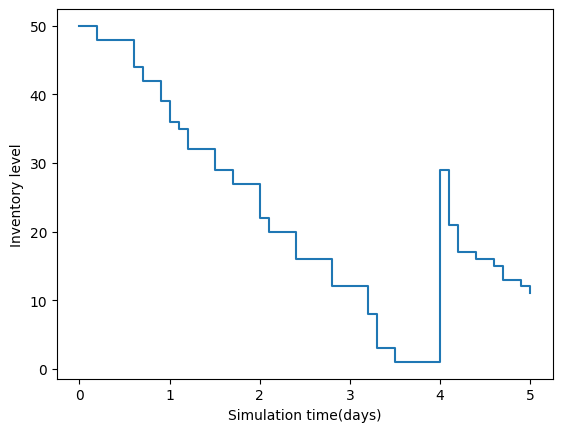

In [5]:
def warehouse_run(env, order_cutoff, order_target): #Se define el 'almacén' con tres entradas: entorno 'env', límite de la orden y destino.
  global inventory, balance, num_ordered #Se definen las varibales como globales
  #Parámetros del almacén
  inventory = order_target #Inventario variable
  balance = 0.0 #Iniciación de la variable 'saldo'
  num_ordered = 0 #Número de productos ordenados

  while True:
    interarrival = generate_interarrival() #Manda a llamar el generador de llegadas
    yield env.timeout(interarrival) #Calcular tiempo de espera
    balance -= inventory*2*interarrival #Saldo = inventario * costo de mantenimiento * tiempo entre llegadas
    demand = generate_demand() #registro de demanda por cliente
    if demand < inventory: #Si la demanda es menor que el inventario
      balance += 100*demand #saldo se incrementará, con la demanda por el costo del producto
      inventory -= demand #Se reduce el inventario de las unidades vendidas
      print ('{:.2f} sold {}'.format(env.now, demand))
    else: #Si la demanda es mayor que el inventario
      balance += 100*inventory
      inventory = 0 #Se venderán todas la unidades quedando con un num de inventario 0
      print ('{:.2f} sold {} (out of stock)'.format(env.now,inventory))
    if inventory < order_cutoff and num_ordered == 0: #Si el inventario está por debajo del límite, se realiaza un nuevo pedido
      env.process(handle_order(env, order_target))

def handle_order(env, order_target): #Determinar cuanto se debe ordenar
  global inventory, balance, num_ordered

  num_ordered = order_target - inventory
  print ('{:.2f} placed order for {}'.format(env.now, num_ordered))
  balance -= 50*num_ordered #se modifica el saldo con los costos correspondientes
  yield env.timeout(2.0)
  inventory += num_ordered
  num_ordered = 0
  print('{:.2f} received order, {} in inventory'.format(env.now, inventory))

def generate_interarrival(): #Generador de llegadas
  return np.random.exponential(1./5)

def generate_demand(): #Generador de demanda
  return np.random.randint(1, 5)

obs_time = []
inventory_level = []

def observe(env):
  global inventory

  while True:
    obs_time.append(env.now)
    inventory_level.append(inventory)
    yield env.timeout(0.1)

np.random.seed(0) #Generación de números aleatorios con inicio o 'semilla' en 0

env = simpy.Environment() #Se define env como el entorno de simulación
env.process(warehouse_run(env, 25, 50)) #La simulación tomará el entorno env con un inventario en 50 y un mínimo en inventario de 25
env.process(observe(env))

env.run(until = 5.0) #Tiempo de ejecución de la simulación: 5 días

plt.figure()
plt.step(obs_time, inventory_level, where = 'post') #Se grafica la simulación
plt.xlabel('Simulation time(days)')
plt.ylabel('Inventory level')